In [236]:
#iimporting all libraries needed for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


In [237]:
#To read the dataset in CSV format and display top 5 rows
df= pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/edx/project/drinks.csv')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [238]:
#Checking the datatypes of columns, as we can use only numerical data for analysis. 
#In our case, all data needed for analysis are int64,float64. So need not change the type of data 
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [239]:
#Checking for any Null values to be replaced by mean().
#In our case, there are no missing values and hence need not replace any values.
#As the data consists of only Countries, Continent and Integers, there is no need to check for Duplicate values.
#No redundant and missing values, dataset is simple in limited number. We can consider the dataset as Clean and start Analysing. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [240]:
#Statistical Analysis of all numerical columns as Country names and Continent names do not have any Statistical analysis
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [241]:
#To find total wines served for each continent. We can see, Europe is the highest wine serving Continent
df[['continent', 'wine_servings']].groupby(['continent']).sum()

,wine_servings
continent,
Africa,862
Asia,399
Europe,6400
North America,564
Oceania,570
South America,749


In [242]:
#To find total beers served for each continent. We can see, Europe is the highest Beer serving Continent as well
df[['continent', 'beer_servings']].groupby(['continent']).sum()

,beer_servings
continent,
Africa,3258
Asia,1630
Europe,8720
North America,3345
Oceania,1435
South America,2101


In [243]:
#To find total spirit served for each continent. We can see, Europe is leading in selling spirits as well. 
#Undoubtedly, Europe seems to have the maximum litres of pure alcohol compared to other continents
df[['continent', 'spirit_servings']].groupby(['continent']).sum()

,spirit_servings
continent,
Africa,866
Asia,2677
Europe,5965
North America,3812
Oceania,935
South America,1377


In [244]:
#Following Europe, Africa is second dominant in total litres of alcohol but weighing only less than half the litres of Europe.
#Oceanian, South American and Asian continents consumes less than 100litres with Oceania securing the last place with only 54.1L
df[['continent', 'total_litres_of_pure_alcohol']].groupby(['continent']).sum()

,total_litres_of_pure_alcohol
continent,
Africa,159.4
Asia,95.5
Europe,387.8
North America,137.9
Oceania,54.1
South America,75.7


In [245]:
#To find which column has the maximum correlation with Total litres of pure alcohol.
#From the correlation, we can see, Beer_servings are highly contributing to total litres of alcohol followed by wine and spirit. 
df.corr(method="pearson")

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


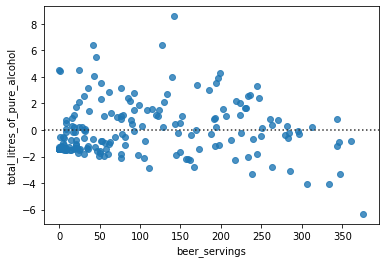

In [246]:
#We try to plot Residual plot with the given test data. We can see there is no curvature in the dots
#Residual plot with all three predictor variables shows no curvature and we proceed with Beer_servings having more correlation


a=df[["beer_servings"]]
b=df[["total_litres_of_pure_alcohol"]]

sns.residplot(a,b,data=df)

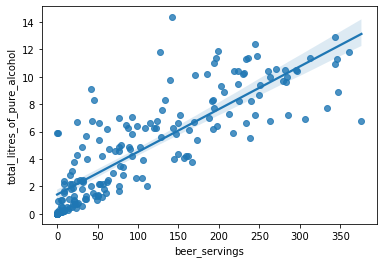

In [247]:
#As confirmation, the regression plot shows a linear relationship between the variables. 

sns.regplot(a,b,data=df)


In [248]:
#We can try performing Simple Linear Regression with Beer_servings as predictor variable
#We Split the Dataset into training and test data so that we can analyse the behaviour of the model when exposed to new data
#Training data is set to 70% and Test Data will be 30%
#For this model, we see the R2 value is 0.687

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
a_train,a_test,b_train,b_test = train_test_split(a,b,test_size=0.3,random_state=0)
lm.fit(a_train,b_train)
yhat = lm.predict(a_test)
yhat[0:5]
m1=mean_squared_error(b_test,yhat)
l1=lm.score(a_test,b_test)
print(m1)
print(l1)

4.2003584380055266
0.6877874616677934


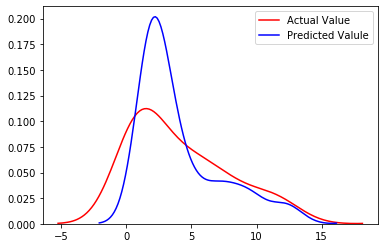

In [249]:
#Comparing Actual value and Predicted value with above model using Distribution Plot
#We see there is a huge mismatch in prediction from 0.100 - 0.200 of Total Litres of alcohol

ax1=sns.distplot(b_test,hist=False,color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color='b', label="Predicted Valule",ax=ax1)




In [250]:
#We can try using Mulitple Linear Regression model using all predictor variables with similar properties of above
#We see, the R2 square value is more than previous model and Mean Square Error is less comparitively
 

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lm2=LinearRegression()
x=df[["beer_servings","wine_servings","spirit_servings"]]
y=df[["total_litres_of_pure_alcohol"]]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
lm2.fit(x_train,y_train)
yhat2 = lm2.predict(x_test)
yhat2[0:5]
m2=mean_squared_error(y_test,yhat2)
l2=lm2.score(x_test,y_test)
print(m2)
print(l2)

3.296640323921626
0.7549608066333018


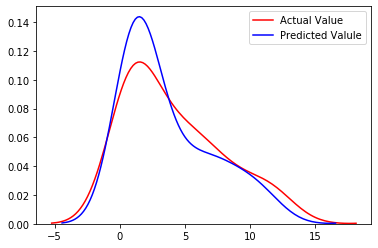

In [161]:
#Comparing Actual value and Predicted value with above model using Distribution Plot
#We see the mismatch in prediction from 0.100 - 0.14 of Total Litres of alcohol which is better than previous model

ax1=sns.distplot(y_test,hist=False,color="r", label="Actual Value")
sns.distplot(yhat2, hist=False, color='b', label="Predicted Valule",ax=ax1)


In [252]:
#We will try to standardize the dataset before feeding them in Linear Regression model and observe changes
#We have created a pipeline to perform standardization and Linear Regression Process
#As we can notice, there is no significant difference in the Rsquared and MSE value on standardizing
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
Input = [('scale',StandardScaler()),('model',LinearRegression())]
pip = Pipeline(Input)
pip.fit(x_train,y_train)
yhat3=pip.predict(x_test)
yhat3[0:5]
m3=mean_squared_error(y_test,yhat3)
pip1=pip.score(x_test,y_test)
print(m3)
print(pip1)

3.296640323921627
0.7549608066333018


In [253]:
#We will try using Ridge Regression to eliminate Standard errors and check if we can get better prediction
#Similar to previous technique, we don't find any significant improvement in prediction
from sklearn.linear_model import Ridge
rid=Ridge(alpha=0.1)
rid.fit(x_train,y_train)
yhat4=rid.predict(x_test)
yhat4[0:5]
m4=mean_squared_error(y_test,yhat4)
rid1=rid.score(x_test,y_test)
print(m4)
print(rid1)

3.296640164941763
0.7549608184502712


In [254]:
#We will include Polynomial Regression along with Linear Regression to eliminate Overfitting, Underfitting and
#bring best approximation
#Degree 3 Polynomial Regression tends to show high prediction as compared to degree 2 and 4 and hence we fix degree to be 3.
#It's evident from MSE and R2 that the Polynomial Regression with Degree 3 proves to be the best predictor for Alcohol Dataset.
pr = PolynomialFeatures(degree=3)
pr1=pr.fit_transform(x_train)
pr2=pr.fit_transform(x_test)
lm3=LinearRegression()
lm3.fit(pr1,y_train)
yhat5=lm3.predict(pr2)
yhat5[0:5]
m5=mean_squared_error(y_test,yhat5)
l2=lm3.score(pr2,y_test)
print(m5)
print(l2)

3.0313195550924377
0.774682092788049


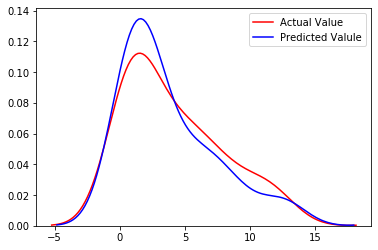

In [255]:
#Visualizing the Polynomial Regression using Distribution Plot
#The plot shows the values of Prediction and Actual more closely match as compared to any previous model.
ax1=sns.distplot(y_test,hist=False,color="r", label="Actual Value")
sns.distplot(yhat5, hist=False, color='b', label="Predicted Valule",ax=ax1)